## Task 1: Permutations and Combinations
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

------------------------------------------------- 



We need to first import requires packages and we will define a variable for our total cups and a variable for cups with the milk first.

https://docs.python.org/3/library/math.html

In [409]:
import math

# Total amount of cups
total_cups = 8
# Cups with milk first
cups_with_milk_first = 4


Now, we van use the math.comb() function to find the total amount of ways we can get the 6 cups with milk added first from the total amount of cups.

https://docs.python.org/3/library/math.html#math.comb

In [410]:
# Total ways to get the 6 cups from 12 
total_combinations = math.comb(total_cups, cups_with_milk_first)

Now we can calculate the probability that the 6 cups chosen are the correct one with milk added first.

There can only be one correct senario here that the person picks the 6 correct cups (the order of the 6 milk cups does not matter) so can will assigne that value as 1.

Probability can be calculated with the following:

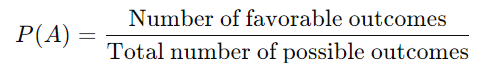


In [411]:
# There is only one specific combination of the correct cups with all milk first
all_milk_first_cups_solution = 1

# calculate probability of selecting the correct 6 cups
all_milk_cups_first_probability = all_milk_first_cups_solution / total_combinations


Let's see what the probability is!

In [412]:
# Print Probability of all milk cups
print("The probability of 6 correct cups being chosen is",all_milk_cups_first_probability)

The probability of 6 correct cups being chosen is 0.014285714285714285


Now, let's look at probability of the scenario where we would accept at least 1 error when selecting the correct cups.

Earlier we saw the total combinations to be math.comb(12, 6).

Now the total combinations will become existing math.comb(12, 6)  +  whatever the possible combination of the other senario is.

This other senario would the be math.comb(6, 5) * math.comb(6, 1)  e.g choosing 5 correct cups and 1 incorrect cup. 

In [413]:
# combinations for 1 error
one_error_milk_first_cups_solution = math.comb(6, 5) * math.comb(6, 1)

# total combinations of outcomes we would want
combined_outcomes = all_milk_first_cups_solution + one_error_milk_first_cups_solution


Now that we have all our outcomes, let's calculate the probability of select at least 5 of the milk first cups!

In [414]:
# Probability of at most one error
one_error_max_probability = combined_outcomes / total_combinations

print("The probability of at least 5 correct cups being chosen is", one_error_max_probability)

The probability of at least 5 correct cups being chosen is 0.5285714285714286


The next question we would ask is: would we accept 2 errors in this process?

I would say no. The reason is that having the option to have 2 errors makes the process significantly easier in terms of probability. Just look at the difference in probability between guessing all 6 correct (0.001) vs 5 correct (0.04). The probability greatly increases when the option of 1 error is introduced. 

This would further be increased when we up to error count to 2. At that point it may get hard to differenciate between the person knowing the milk was added first vs them purely guessing the answer.

------------------------------

--------------------------

----------------------------

## Task 2: numpy's Normal Distribution
In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

------------------------------

First, let's generate 100,000 values with mean = 10.0 and standard deviation 3.0.

See python docs for more info: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 

In [415]:
import numpy as np

mean = 10.0
std_dev =  3.0
size = 100000

# create sample data
data = np.random.normal(mean, std_dev, size)

The values have been generated. Let's take a quick look at the stats from the data:

In [416]:
print('The mean is : ', np.mean(data))

print("The Standard Deviation is : ", np.std(data))

The mean is :  9.980569504532099
The Standard Deviation is :  3.000294546006145


We can see the values above are very close to the initially defined values for the mean and standard deviation.

Next, let's test whether our sample came from a normal distribution. We can do this by using a Shapiro-Wilk test.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro 

In [417]:
from scipy import stats

# Perform the Shapiro Wilk test.
stats.shapiro(data)


ShapiroResult(statistic=0.9999855756759644, pvalue=0.9890644550323486)

Now that we have the results from the test, let's discuss how they would be interpeted.

We have 2 values: Statistic and P-Value.






##### *Statistic*
This measures how closely the sample distribution links to a normal distribution. The range is 0 - 1. The close the statistic is to 1, the closer it is to a normal distribution. The closer to 0 suggests a higher deviation than normal.

##### *P-Value*
The p-value represents the probability of observing the test statistic under the null hypothesis, which states that the sample is drawn from a normal distribution.  The range is 0 - 1. Commonly, the p-value significance level is taken to be 0.05. If the p-value from the Shapiro-Wilk test is below 0.05, we would reject the null hypothesis and say the sample is not from a normal distribution.

If the p-value is greater or equal to 0.05, you would fail to reject the null hypothesis as this suggests there isn't enough evidence to say the sample isn't from a normal distribution.

P-Value and Statistic are used together to evaluate the sample. A high statistic and a high p-value suggest normality, wheras a low statistic and a low p-value suggest a deviation from normality.



Following this, let us now plot the data we have generated with the Probability Density Function.

Here are some resources:


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram

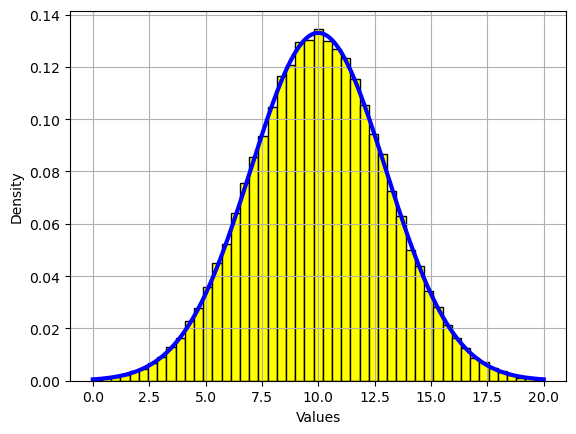

In [481]:
from matplotlib import pyplot as plt

# initialize plot
fig, ax = plt.subplots()

# plot histogram between 0 and 20 with 50 bin size.  
ax.hist(data, edgecolor='black', density=True, bins=np.linspace(0, 20, 50), color ='yellow')

# Generate x values for the normal distribution Probability Density Function between 0 and 20 with 1001 values
x = np.linspace(0, 20, 1001) 
pdf = stats.norm.pdf(x, mean, std_dev)

# plot the distribution
ax.plot(x, pdf, linewidth='3', color ='blue')

ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.grid()

plt.show()

----------------------
----------------------
----------------------

## Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

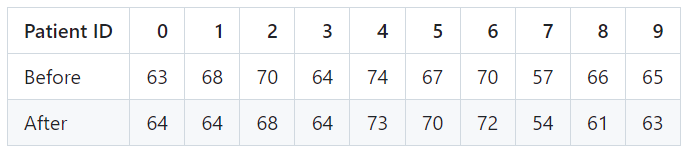

Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used. 

---------------------------


First, let's set up the data:

In [32]:
# Numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# create arrays of before and after heart rates
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])


Next, we need to know how to calculate the t-statistic:

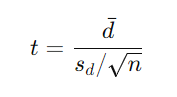

For this equation, we will need to find the differences, mean and std deviation.


In [44]:
# Calculate the differences of the data
differences = after - before

# Calculate the mean and std deviation
mean = np.mean(differences)
std = np.std(differences, ddof=1)
n = len(differences)

# Step 3: Calculate the t-statistic
t_statistic = mean / (std / np.sqrt(n))

print(f"t-statistic : {t_statistic}")

t-statistic : -1.3372274824806283


Now, we should compare this against this against the value given by scipy.stats

In [45]:
# Use scipy's ttest_rel to calculate the paired t-test
t_statistics_scipy, p_value = stats.ttest_rel(before, after)

print(f"t-statistic: {t_statistics_scipy}")

t-statistic: 1.337227482480628
